# 过滤法

## 方差过滤

### 测试VarianceThreshold

In [1]:
# 导入必要的包
from sklearn.feature_selection import VarianceThreshold
import numpy as np
import pandas as pd

In [2]:
# 导入数据
data = pd.read_csv('digit.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
X.shape, y.shape

((42000, 784), (42000,))

In [4]:
x_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)
x_fsvar.shape

(42000, 392)

In [5]:
x_bvar = VarianceThreshold(0.8 * (1 - 0.8)).fit_transform(X)
x_bvar.shape

(42000, 685)

### 比较KNN与随机森林

In [6]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
import numpy as np

X = data.iloc[:, 1:]
y = data.iloc[:, 0]

x_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)

In [7]:
cross_val_score(RFC(n_estimators=10, random_state=0), X, y, cv=5).mean()

0.9373571428571429

In [8]:
cross_val_score(RFC(n_estimators=10, random_state=0), x_fsvar, y, cv=5).mean()

0.9390476190476191

In [9]:
cross_val_score(KNN(), X, y, cv=5).mean()

0.965857142857143

In [10]:
cross_val_score(KNN(), x_fsvar, y, cv=5).mean()

0.966

## 相关性过滤

### $\chi^2$检验

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score

In [14]:
X_fschi = SelectKBest(chi2, k=300).fit_transform(x_fsvar, y)
X_fschi.shape

(42000, 300)

In [15]:
cross_val_score(RFC(n_estimators=10, random_state=0), X_fschi, y, cv=5).mean()

0.9344761904761905

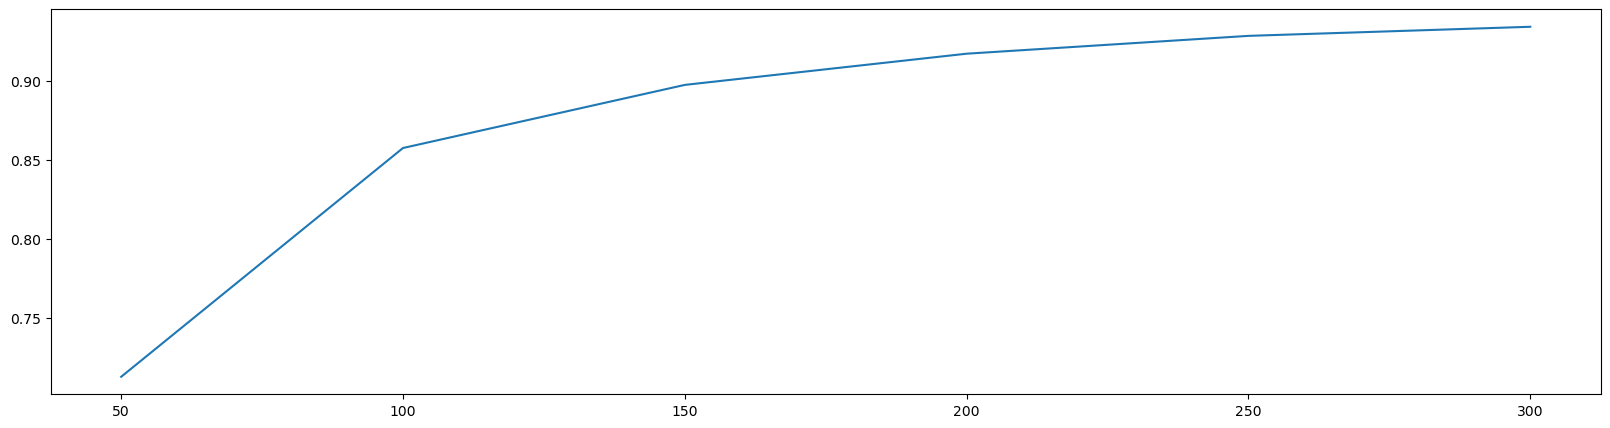

In [16]:
Klist = range(50, 301, 50)
score = []
for i in Klist:
    X_fschi = SelectKBest(chi2, k=i).fit_transform(x_fsvar, y)
    once = cross_val_score(RFC(n_estimators=10, random_state=0), X_fschi, y, cv=5).mean()
    score.append(once)
    
import matplotlib.pyplot as plt
plt.figure(figsize=[20, 5])
plt.plot(Klist, score)
plt.show()

In [20]:
Klist[score.index(max(score))]

300

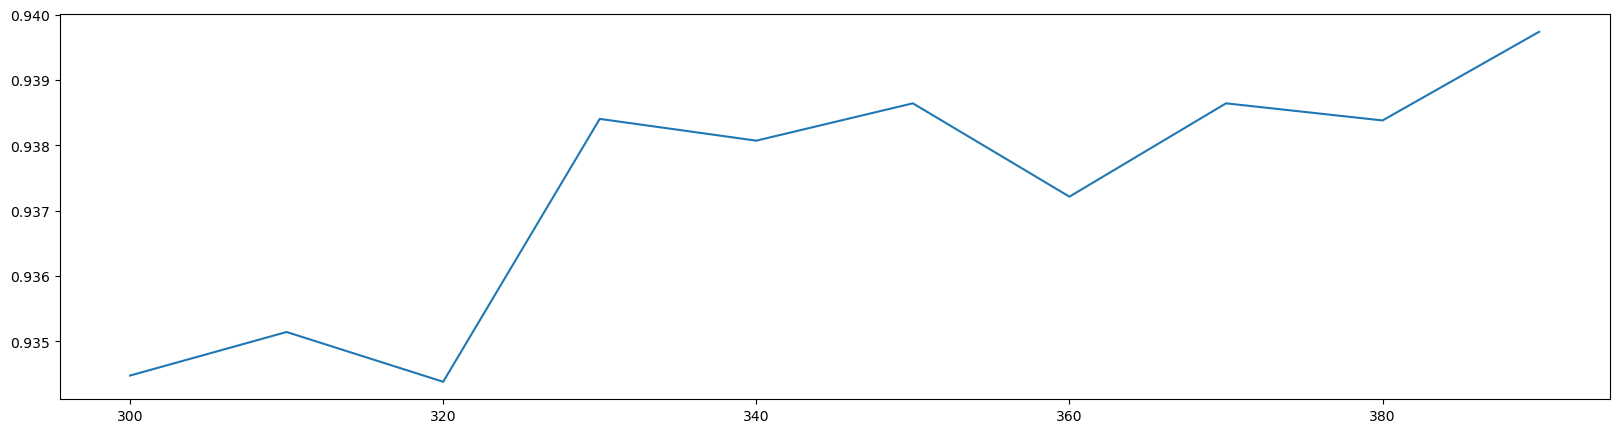

In [22]:
Klist = range(300, 400, 10)
score = []
for i in Klist:
    X_fschi = SelectKBest(chi2, k=i).fit_transform(x_fsvar, y)
    once = cross_val_score(RFC(n_estimators=10, random_state=0), X_fschi, y, cv=5).mean()
    score.append(once)
    
import matplotlib.pyplot as plt
plt.figure(figsize=[20, 5])
plt.plot(Klist, score)
plt.show()

### F检验

In [23]:
from sklearn.feature_selection import f_classif

F, pvalues_f = f_classif(x_fsvar, y)
F

array([ 618.65383492,  846.18897012, 1115.40617051, 1362.3677305 ,
       1452.03355369, 1381.09095571, 1138.26505266,  464.29616121,
        660.00977785,  849.66393412, 1004.7450309 , 1124.76177588,
       1200.99190762, 1209.29489877, 1110.4944286 ,  854.66183292,
        577.52063451,  342.09729054,  178.67397866,  118.01145533,
        612.12261014,  899.40904291, 1196.17528948, 1424.49864852,
       1569.26556677, 1742.49910702, 1910.98023795, 1969.20520223,
       1731.37475948, 1295.09668012,  839.15325001,  531.97951763,
        371.82392681,  336.00820537,  378.93378743,  317.47025479,
        528.94881012,  766.40792176,  947.63168717, 1086.0472161 ,
       1177.72017709, 1253.79641973, 1344.06961068, 1507.33781169,
       1616.50454434, 1512.25864876, 1289.65180587, 1051.26276412,
        839.48869386,  680.07426932,  600.85538567,  633.55772663,
        683.96908509,  347.65867784,  452.76238211,  509.16387684,
        515.7498157 ,  532.86107778,  594.62512658,  664.18740

In [24]:
pvalues_f

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.71193533e-220,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [25]:
X_fsF = SelectKBest(f_classif, k=300).fit_transform(x_fsvar, y)
X_fsF.shape

(42000, 300)

In [26]:
cross_val_score(RFC(n_estimators=10, random_state=0), X_fschi, y, cv=5).mean()

0.9397380952380953

### 互信息法

In [27]:
from sklearn.feature_selection import mutual_info_classif as MIC
result = MIC(x_fsvar, y)
result

array([0.06811907, 0.08394556, 0.10210512, 0.11246914, 0.10995786,
       0.10748839, 0.08022667, 0.05251645, 0.07085542, 0.10231036,
       0.12151126, 0.14024226, 0.15960213, 0.17213069, 0.15152113,
       0.12805377, 0.09637602, 0.07010352, 0.04019208, 0.02679991,
       0.07072829, 0.09424812, 0.11985719, 0.15240703, 0.17330484,
       0.20451113, 0.22371698, 0.23239018, 0.21236476, 0.18222268,
       0.13327462, 0.10750699, 0.07585369, 0.06245718, 0.04940032,
       0.03075545, 0.05743219, 0.07900569, 0.10079819, 0.12122805,
       0.13224081, 0.14419418, 0.17009421, 0.17951099, 0.18758901,
       0.17195678, 0.15601139, 0.12692471, 0.1132569 , 0.09497814,
       0.08178805, 0.07009252, 0.0655108 , 0.04776034, 0.05787451,
       0.07400184, 0.08981438, 0.09677572, 0.1099134 , 0.11059836,
       0.10930526, 0.11988529, 0.11894239, 0.11597924, 0.11446744,
       0.11722837, 0.11712804, 0.10474193, 0.09383737, 0.08077137,
       0.064712  , 0.038294  , 0.05346172, 0.063793  , 0.07938

In [28]:
X_fsMIC = SelectKBest(MIC, k=300).fit_transform(x_fsvar, y)
X_fsMIC.shape

(42000, 300)

In [29]:
cross_val_score(RFC(n_estimators=10, random_state=0), X_fsMIC, y, cv=5).mean()

0.9380952380952381

# 嵌入法

In [36]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

RFC_ = RFC(n_estimators=10, random_state=0)

X_embedded = SelectFromModel(RFC_, threshold=0.000564).fit_transform(x_fsvar, y)
X_embedded.shape

(42000, 321)

In [37]:
# 交叉验证
from sklearn.model_selection import cross_val_score
cross_val_score(RFC_, X_embedded, y, cv=5).mean()

0.9383333333333332

In [38]:
from sklearn.neighbors import KNeighborsClassifier as KNN
cross_val_score(KNN(), X_embedded, y, cv=5).mean()

0.9662857142857144

# 包装法

In [39]:
from sklearn.feature_selection import RFE
RFC_ = RFC(n_estimators=10, random_state=0)
selector = RFE(RFC_, n_features_to_select=340, step=50).fit(x_fsvar, y)

In [40]:
x_wrapper = selector.transform(x_fsvar)
cross_val_score(RFC_, x_wrapper, y, cv=5).mean()

0.9380000000000001

In [41]:
selector.ranking_

array([1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,